In [ ]:
{
install.packages('haven')
install.packages('dplyr')
install.packages('corrplot')
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("DescTools")
install.packages("stargazer")
}


In [ ]:
{
library('DescTools')
library('corrplot')
library(haven)
library(dplyr)
library(ggplot2)
library(tidyverse)
library("stargazer")
}

In [7]:
options(warn = -1)
HSE_2018_FIN <- read_sav("HSE_2018_FIN.SAV")  #Источник данных http://sophist.hse.ru/db/oprosy.shtml?ts=188&en=0&ysclid=lh7m5n2rs2687566165
HSE_2017_FIN <- read_sav("HSE_2017_FIN.SAV")
data<-bind_rows(HSE_2018_FIN,HSE_2017_FIN)

In [ ]:
data$FINLIT<-c(rep(1, length(data$qЖ28)))
len<-length(data$qЖ28)
len
for(i in 1:len) {
  sum=0
  if (data$qЖ28[i]==1) {
    sum=sum+1
  }
  if (data$qЖ29[i]==1) {
    sum=sum+1
  }
  if (data$qЖ30[i]==3) {
    sum=sum+1
  }
  if (data$qЖ31[i]==2) {
    sum=sum+1
  }
  if (data$qЖ32[i]==1) {
    sum=sum+1
  }
  data$FINLIT[i]<-sum
}
data$FINLIT

data_perc <- t(prop.table(table(data$FINLIT)))
barplot(data_perc, ylab = "Percent")

In [ ]:
data$savings<-c(rep(1, length(data$qB1)))
data$savings

for (i in 1:len) {
  if (data$qB1[i]==1) {
    data$savings[i]=1
  }
  else if (data$qB1[i]==2) {
    data$savings[i]=0
  }
  else {
    data$savings[i]=NA
  }

}

data$delay<-c(rep(1, length(data$qГ6.2)))
data$delay

for (i in 1:len) {
  if (is.na(data$qГ6.2[i])) {
    data$delay[i]=NA
  }
  else  if (data$qГ6.2[i]==1) {
    data$delay[i]=1
  }
  else if (data$qГ6.2[i]==2) {
    data$delay[i]=0
  }
  else {
    data$delay[i]=NA
  }
}

data$card<-c(rep(1, length(data$qГ12)))
data$card

for (i in 1:len) {
  if (is.na(data$qГ12[i])) {
    data$card[i]=NA
  }
  else  if (data$qГ12[i]==1) {
    data$card[i]=1
  }
  else if (data$qГ12[i]==2 | data$qГ12[i]==3) {
    data$card[i]=0
  }
  else {
    data$card[i]=NA
  }
}


data$payment_systems<-c(rep(1, length(data$qГ18)))
data$payment_systems

for (i in 1:len) {
  if (is.na(data$qГ18[i])) {
    data$payment_systems[i]=NA
  }
  else  if (data$qГ18[i]==1) {
    data$payment_systems[i]=1
  }
  else if (data$qГ18[i]==2) {
    data$payment_systems[i]=0
  }
  else {
    data$payment_systems[i]=NA
  }
}

data$financial_goals<-c(rep(1, length(data$qE1)))
data$financial_goals

for (i in 1:len) {
  if (is.na(data$qE1[i])) {
    data$financial_goals[i]=NA
  }
  else  if (data$qE1[i]==1) {
    data$financial_goals[i]=1
  }
  else if (data$qE1[i]==2) {
    data$financial_goals[i]=0
  }
  else {
    data$financial_goals[i]=NA
  }
}

data$planning<-c(rep(1, length(data$qK1)))
data$planning

for (i in 1:len) {
  if (is.na(data$qK1[i])) {
    data$planning[i]=NA
  }
  else  if (data$qK1[i]==1) {
    data$planning[i]=1
  }
  else if (data$qK1[i]==2) {
    data$planning[i]=0
  }
  else {
    data$planning[i]=NA
  }
}


data$totalincome<-c(rep(1, length(data$qД27)))

for (i in 1:len) {
  if (is.na(data$qД26[i])==FALSE) {
    #print(data1$qД26[i])
    data$totalincome[i]=data$qД26[i]
  }
  else {
    #print(data1$qД27[i])
    if  (data$qД27[i]<=5) {
      data$totalincome[i]=data$qД27[i]*2000-1000
    }
    else if (data$qД27[i]<=9) {
      data$totalincome[i]=(data$qД27[i]-6)*5000+12500
    }
    else if (data$qД27[i]<=16) {
      data$totalincome[i]=(data$qД27[i]-10)*10000+35000
    }
    else if (data$qД27[i]<=18){
      data$totalincome[i]=(data$qД27[i]-17)*20000+110000
    }
    else {
      data$totalincome[i]=NA
    }
  }
}

data$income<-data$totalincome/data$qД4

data$sex<-as.numeric(data$qД1==1)

data$age<-data$qД2_1

data$degree<-as.numeric(data$qД3==1)

data$people<-data$qД4

data$married<-c(rep(1, length(data$qД20)))

for (i in 1:len) {
  if (is.na(data$qД20[i])) {
    data$married[i]=NA
  }
  else  if (data$qД20[i]==1) {
    data$married[i]=1
  }
  else if (data$qД20[i]==2) {
    data$married[i]=0
  }
  else {
    data$married[i]=NA
  }
}

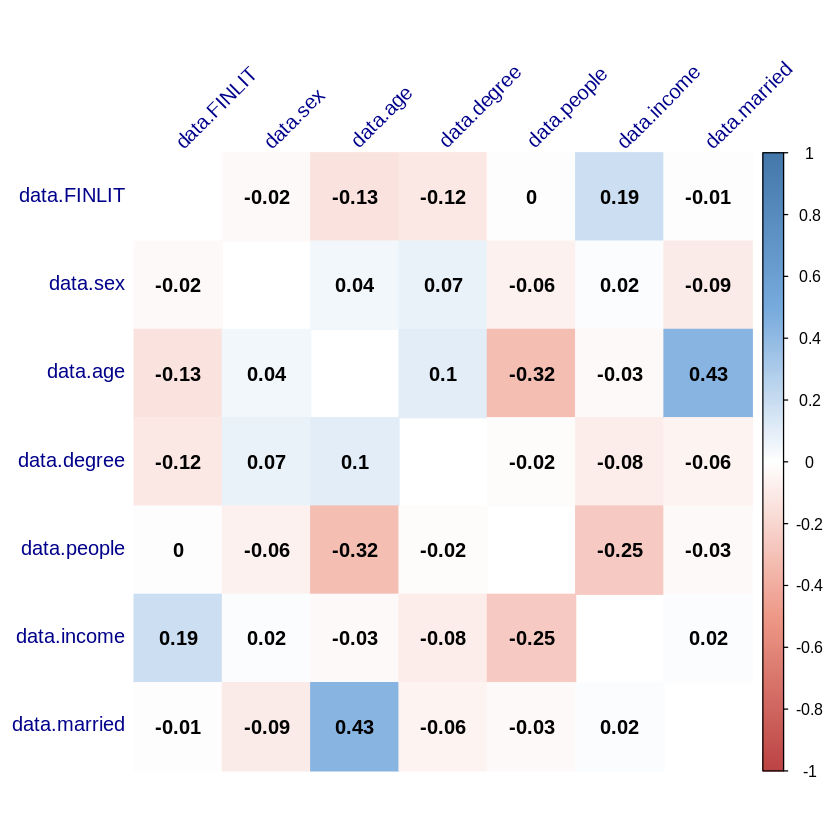

In [10]:
df<-data.frame(data$FINLIT,  data$sex,   data$age, data$degree, data$people, data$income, data$married)
M<-cor(df, use = "complete.obs")
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(M, method = "color", col = col(200),
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "darkblue", tl.srt = 45, #Text label color and rotation
         # hide correlation coefficient on the principal diagonal
         diag = FALSE
)

In [11]:
summary(df)

  data.FINLIT       data.sex         data.age      data.degree     
 Min.   :0.000   Min.   :0.0000   Min.   :18.00   Min.   :0.00000  
 1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:31.00   1st Qu.:0.00000  
 Median :3.000   Median :0.0000   Median :45.00   Median :0.00000  
 Mean   :3.024   Mean   :0.4531   Mean   :44.98   Mean   :0.04921  
 3rd Qu.:4.000   3rd Qu.:1.0000   3rd Qu.:58.00   3rd Qu.:0.00000  
 Max.   :5.000   Max.   :1.0000   Max.   :95.00   Max.   :1.00000  
                                                                   
  data.people     data.income      data.married   
 Min.   :1.000   Min.   :   200   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.: 10000   1st Qu.:1.0000  
 Median :2.000   Median : 15000   Median :1.0000  
 Mean   :2.604   Mean   : 17720   Mean   :0.8362  
 3rd Qu.:3.000   3rd Qu.: 21250   3rd Qu.:1.0000  
 Max.   :9.000   Max.   :350000   Max.   :1.0000  
                 NA's   :577      NA's   :942     

In [12]:
stargazer(df,  type = "text")


Statistic      N      Mean     St. Dev.    Min       Max    
------------------------------------------------------------
data.FINLIT  3,231   3.024      1.562       0         5     
data.sex     3,231   0.453      0.498       0         1     
data.age     3,231   44.978     16.814     18        95     
data.degree  3,231   0.049      0.216       0         1     
data.people  3,231   2.604      1.210       1         9     
data.income  2,654 17,719.990 13,902.360 200.000 350,000.000
data.married 2,289   0.836      0.370       0         1     
------------------------------------------------------------


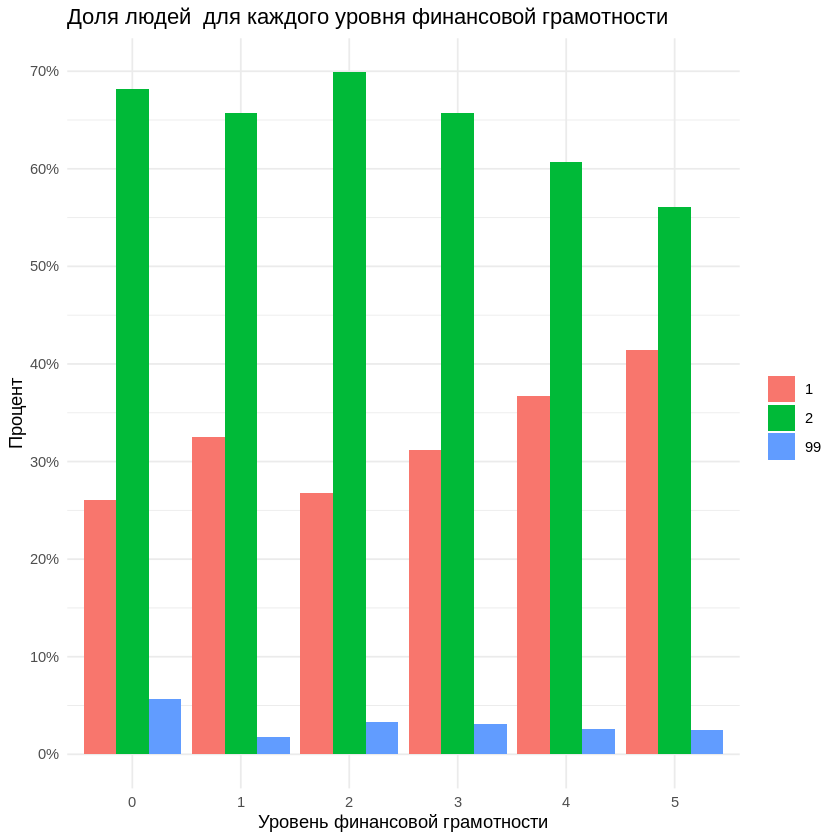

In [13]:
my_data_percent <- data %>%
  count(FINLIT, qB1) %>%
  group_by(FINLIT) %>%
  mutate(percentage = n / sum(n))

# Построение графика
ggplot(my_data_percent, aes(x = factor(FINLIT), y = percentage, fill = factor(qB1))) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.1)) +
  labs(title = "Доля людей  для каждого уровня финансовой грамотности",
       x = "Уровень финансовой грамотности",
       y = "Процент",
       fill = NULL) +
  theme_minimal()

In [14]:
savings <- lm(savings ~ FINLIT+sex+age+degree+people+income, data = data)
summary(savings)


Call:
lm(formula = savings ~ FINLIT + sex + age + degree + people + 
    income, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8093 -0.3517 -0.2604  0.5492  0.9641 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.390e-01  5.129e-02  -2.710 0.006768 ** 
FINLIT       3.392e-02  6.077e-03   5.582 2.62e-08 ***
sex         -2.911e-02  1.840e-02  -1.582 0.113781    
age          4.315e-03  6.004e-04   7.186 8.64e-13 ***
degree       7.851e-03  4.246e-02   0.185 0.853309    
people       2.962e-02  8.515e-03   3.478 0.000513 ***
income       7.394e-06  6.914e-07  10.693  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4628 on 2607 degrees of freedom
  (617 observations deleted due to missingness)
Multiple R-squared:  0.06798,	Adjusted R-squared:  0.06583 
F-statistic: 31.69 on 6 and 2607 DF,  p-value: < 2.2e-16


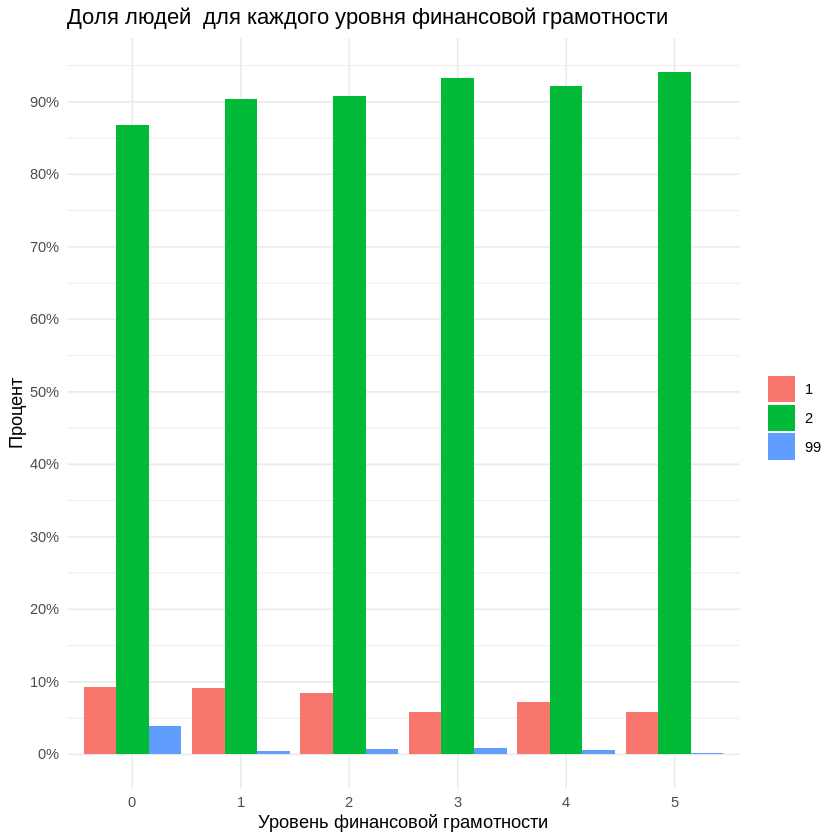

In [15]:
my_data_percent <- data %>%
  count(FINLIT, qГ6.2) %>%
  group_by(FINLIT) %>%
  mutate(percentage = n / sum(n))

# Построение графика
ggplot(my_data_percent, aes(x = factor(FINLIT), y = percentage, fill = factor(qГ6.2))) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.1)) +
  labs(title = "Доля людей  для каждого уровня финансовой грамотности",
       x = "Уровень финансовой грамотности",
       y = "Процент",
       fill = NULL) +
  theme_minimal()




In [16]:
delay<-lm(delay ~ FINLIT+sex+age+degree+people+income, data = data)
summary(delay)


Call:
lm(formula = delay ~ FINLIT + sex + age + degree + people + income, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17336 -0.08693 -0.06947 -0.05202  0.96940 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.357e-01  2.869e-02   4.728 2.39e-06 ***
FINLIT      -7.299e-03  3.402e-03  -2.146  0.03198 *  
sex          1.379e-02  1.028e-02   1.341  0.17988    
age         -8.917e-04  3.353e-04  -2.659  0.00788 ** 
degree       4.331e-02  2.350e-02   1.843  0.06545 .  
people       2.507e-03  4.772e-03   0.525  0.59935    
income      -7.936e-07  3.857e-07  -2.058  0.03971 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2598 on 2627 degrees of freedom
  (597 observations deleted due to missingness)
Multiple R-squared:  0.008894,	Adjusted R-squared:  0.00663 
F-statistic: 3.929 on 6 and 2627 DF,  p-value: 0.000649


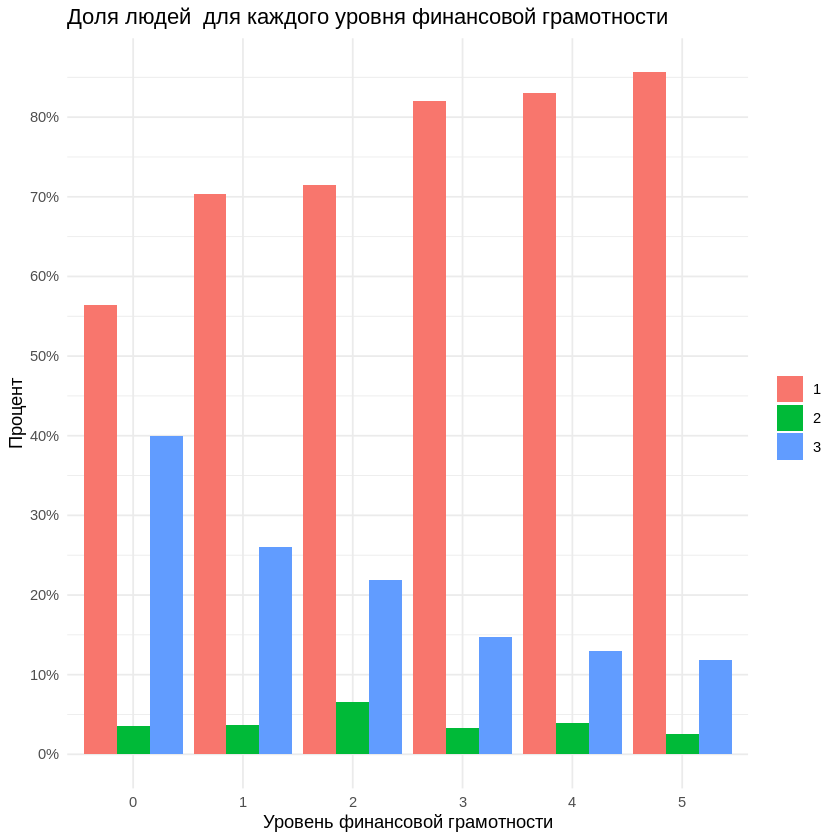

In [17]:
my_data_percent <- data %>%
  count(FINLIT, qГ12) %>%
  group_by(FINLIT) %>%
  mutate(percentage = n / sum(n))

# Построение графика
ggplot(my_data_percent, aes(x = factor(FINLIT), y = percentage, fill = factor(qГ12))) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.1)) +
  labs(title = "Доля людей  для каждого уровня финансовой грамотности",
       x = "Уровень финансовой грамотности",
       y = "Процент",
       fill = NULL) +
  theme_minimal()

In [18]:
card<-lm(card ~ FINLIT+sex+age+degree+people+income, data = data)
summary(card)


Call:
lm(formula = card ~ FINLIT + sex + age + degree + people + income, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0797 -0.0438  0.1136  0.2404  0.8003 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.487e-01  4.130e-02  20.551  < 2e-16 ***
FINLIT       3.306e-02  4.894e-03   6.756 1.74e-11 ***
sex         -6.240e-02  1.484e-02  -4.206 2.69e-05 ***
age         -6.344e-03  4.832e-04 -13.129  < 2e-16 ***
degree      -2.655e-01  3.391e-02  -7.832 6.91e-15 ***
people       3.450e-02  6.880e-03   5.015 5.67e-07 ***
income       4.040e-06  5.565e-07   7.261 5.04e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3763 on 2647 degrees of freedom
  (577 observations deleted due to missingness)
Multiple R-squared:  0.1841,	Adjusted R-squared:  0.1823 
F-statistic: 99.55 on 6 and 2647 DF,  p-value: < 2.2e-16


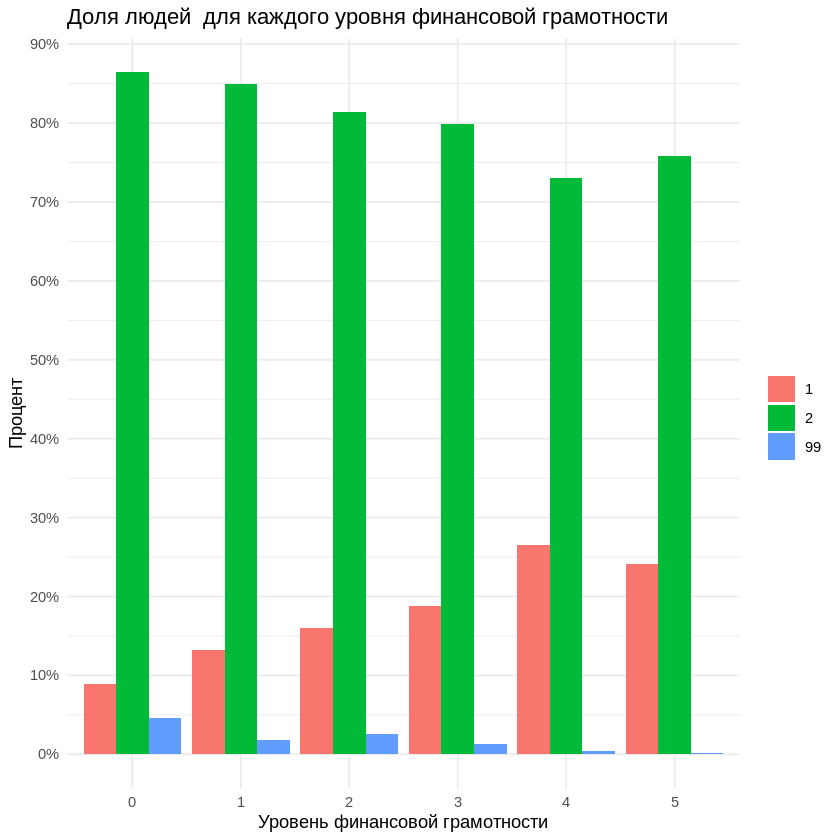

In [19]:
my_data_percent <- data %>%
  count(FINLIT, qГ18) %>%
  group_by(FINLIT) %>%
  mutate(percentage = n / sum(n))

# Построение графика
ggplot(my_data_percent, aes(x = factor(FINLIT), y = percentage, fill = factor(qГ18))) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.1)) +
  labs(title = "Доля людей  для каждого уровня финансовой грамотности",
       x = "Уровень финансовой грамотности",
       y = "Процент",
       fill = NULL) +
  theme_minimal()

In [20]:
systems<-lm(payment_systems ~ FINLIT+sex+age+degree+people+income, data = data)
summary(systems)


Call:
lm(formula = payment_systems ~ FINLIT + sex + age + degree + 
    people + income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05398 -0.25169 -0.12285  0.03919  1.04622 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.037e-01  4.097e-02   7.413 1.66e-13 ***
FINLIT       1.746e-02  4.867e-03   3.586 0.000342 ***
sex         -6.927e-04  1.469e-02  -0.047 0.962397    
age         -6.588e-03  4.784e-04 -13.769  < 2e-16 ***
degree       1.954e-02  3.341e-02   0.585 0.558790    
people       1.936e-02  6.824e-03   2.837 0.004586 ** 
income       5.262e-06  5.498e-07   9.570  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3706 on 2616 degrees of freedom
  (608 observations deleted due to missingness)
Multiple R-squared:  0.1409,	Adjusted R-squared:  0.1389 
F-statistic: 71.52 on 6 and 2616 DF,  p-value: < 2.2e-16


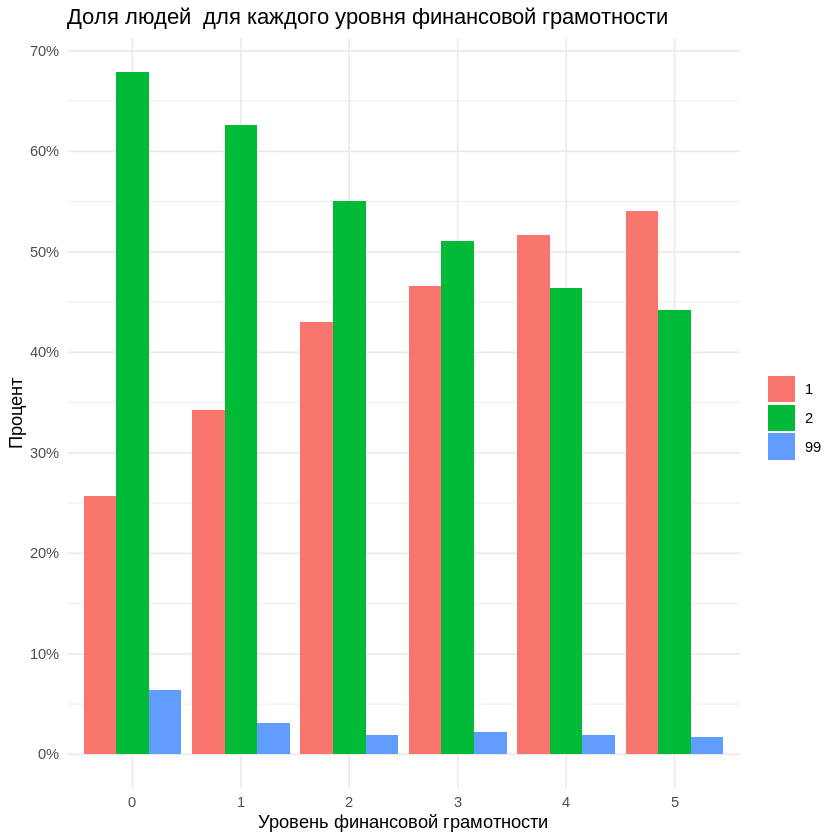

In [21]:
my_data_percent <- data %>%
  count(FINLIT, qE1) %>%
  group_by(FINLIT) %>%
  mutate(percentage = n / sum(n))

# Построение графика
ggplot(my_data_percent, aes(x = factor(FINLIT), y = percentage, fill = factor(qE1))) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.1)) +
  labs(title = "Доля людей  для каждого уровня финансовой грамотности",
       x = "Уровень финансовой грамотности",
       y = "Процент",
       fill = NULL) +
  theme_minimal()

In [22]:
goals<-lm(financial_goals ~ FINLIT+sex+age+degree+people+income, data = data)
summary(goals)


Call:
lm(formula = financial_goals ~ FINLIT + sex + age + degree + 
    people + income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11025 -0.39068 -0.08076  0.39794  1.08706 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.397e-01  5.016e-02  12.754  < 2e-16 ***
FINLIT       2.516e-02  5.974e-03   4.212 2.62e-05 ***
sex         -1.590e-02  1.803e-02  -0.882    0.378    
age         -9.561e-03  5.880e-04 -16.260  < 2e-16 ***
degree      -6.387e-02  4.153e-02  -1.538    0.124    
people       4.564e-02  8.341e-03   5.472 4.88e-08 ***
income       4.291e-06  6.746e-07   6.360 2.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4531 on 2597 degrees of freedom
  (627 observations deleted due to missingness)
Multiple R-squared:  0.1766,	Adjusted R-squared:  0.1747 
F-statistic: 92.82 on 6 and 2597 DF,  p-value: < 2.2e-16


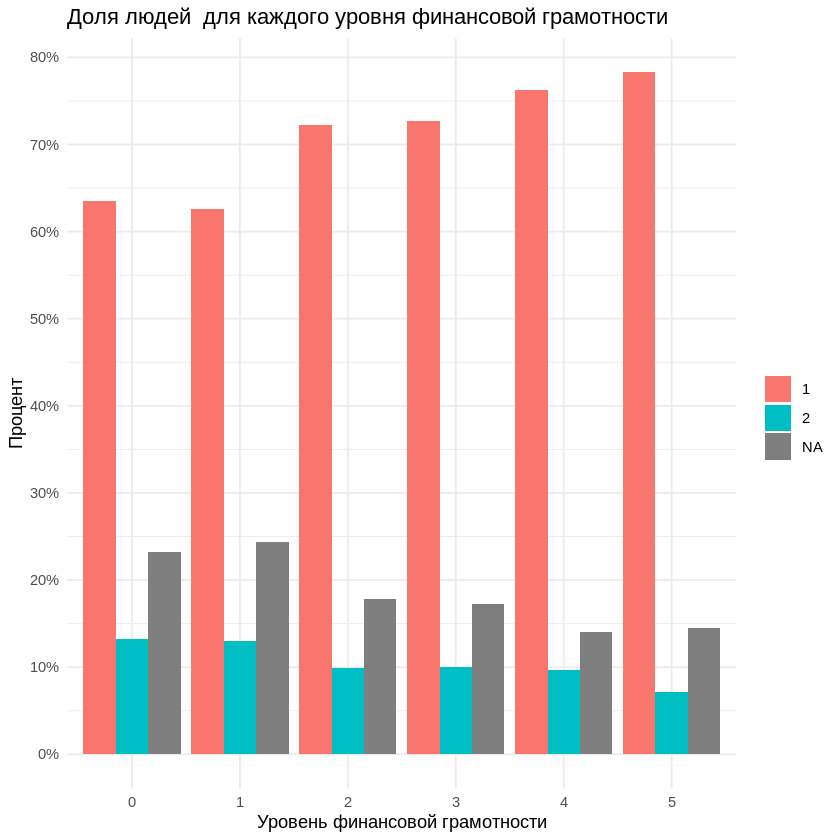

In [23]:
my_data_percent <- data %>%
  count(FINLIT, qK1) %>%
  group_by(FINLIT) %>%
  mutate(percentage = n / sum(n))

# Построение графика
ggplot(my_data_percent, aes(x = factor(FINLIT), y = percentage, fill = factor(qK1))) +
  geom_col(position = "dodge") +
  scale_y_continuous(labels = scales::percent, breaks = seq(0, 1, 0.1)) +
  labs(title = "Доля людей  для каждого уровня финансовой грамотности",
       x = "Уровень финансовой грамотности",
       y = "Процент",
       fill = NULL) +
  theme_minimal()

In [24]:
planning<-lm(planning~ FINLIT+sex+age+degree+people+income, data = data)
summary(planning)


Call:
lm(formula = planning ~ FINLIT + sex + age + degree + people + 
    income, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02023  0.05148  0.09511  0.13130  0.31469 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.342e-01  3.920e-02  18.728  < 2e-16 ***
FINLIT       1.899e-02  4.462e-03   4.255 2.18e-05 ***
sex         -5.427e-02  1.321e-02  -4.107 4.16e-05 ***
age          2.088e-03  4.391e-04   4.755 2.12e-06 ***
degree      -8.528e-02  3.515e-02  -2.426   0.0153 *  
people       1.283e-02  6.885e-03   1.864   0.0625 .  
income      -8.098e-12  6.365e-07   0.000   1.0000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3054 on 2158 degrees of freedom
  (1066 observations deleted due to missingness)
Multiple R-squared:  0.02817,	Adjusted R-squared:  0.02547 
F-statistic: 10.42 on 6 and 2158 DF,  p-value: 2.017e-11


In [25]:
stargazer(savings, delay, card, systems, goals, planning, title="Models", report=( "vc*"),
          keep.stat=c("aic", "rsq", "n", "bic", "adj.rsq", "f"), star.cutoffs = c(0.05, 0.01, 0.001),  single.row = TRUE, type = "text")


Models
                                                                             Dependent variable:                                                                 
             ----------------------------------------------------------------------------------------------------------------------------------------------------
                     savings                   delay                    card               payment_systems          financial_goals              planning        
                       (1)                      (2)                     (3)                      (4)                      (5)                      (6)           
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
FINLIT               0.034***                 -0.007*                 0.033***                 0.017***                 0.025***                 0.019***        
sex                 